In [261]:
dataa = pd.read_csv("DistanceMatrix")

AxesSubplot(0.125,0.125;0.62x0.755)


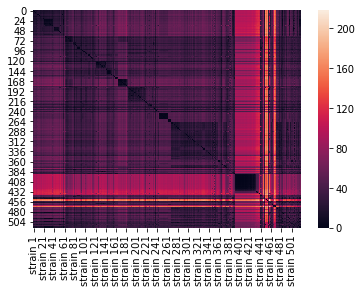

In [262]:
import seaborn as sns
print(sns.heatmap(dataa))

In [263]:
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2,metric='precomputed',perplexity = 25.95)
X_transformed = embedding.fit_transform(dataa)

In [264]:
TSNE_df = pd.DataFrame(X_transformed,columns=['cluster ' + str(i) for i in range(1,3)])
print(TSNE_df.head())

   cluster 1  cluster 2
0   4.282803  16.155666
1   2.629135  16.303616
2   3.933078  16.820419
3   5.281522  16.976622
4   5.691207  17.106323


In [265]:
#merging my final dataframe with their regions and strain names
import pandas as pd
metadata_df = pd.read_csv(r'C:\Users\srava\BedfordProjects\zika\results\metadata.tsv', delimiter='\t')

In [266]:
metadata_df.head()

,strain,virus,accession,date,region,country,division,city,db,segment,authors,url,title,journal,paper_url
0,1_0015_PF,zika,KX447511,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447511,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
1,1_0016_PF,zika,KX447520,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447520,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
2,1_0030_PF,zika,KX447515,2013-11-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447515,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
3,1_0035_PF,zika,KX447514,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447514,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507
4,1_0038_PF,zika,KX447517,2014-01-XX,oceania,french_polynesia,french_polynesia,french_polynesia,genbank,genome,Pettersson et al,https://www.ncbi.nlm.nih.gov/nuccore/KX447517,How Did Zika Virus Emerge in the Pacific Islan...,"MBio 7 (5), e01239-16 (2016)",https://www.ncbi.nlm.nih.gov/pubmed/27729507


In [267]:
strains_df = pd.DataFrame(strains)
strains_df.columns = ['strain']

In [268]:
result_strains = pd.merge(strains_df,metadata_df, on='strain')

In [269]:
finalDf = pd.concat([TSNE_df, result_strains[['region','country','strain']]], axis = 1)

In [270]:
finalDf.head()

,cluster 1,cluster 2,region,country,strain
0,4.282803,16.155666,north_america,dominican_republic,DOM/2016/MA_WGS16_024
1,2.629135,16.303616,north_america,dominican_republic,DOM/2016/BB_0180
2,3.933078,16.820419,north_america,dominican_republic,DOM/2016/BB_0115
3,5.281522,16.976622,north_america,dominican_republic,DOM/2016/BB_0208
4,5.691207,17.106323,north_america,dominican_republic,DOM/2016/MA_WGS16_007


# Creating the tree in Altair

In [271]:
import altair as alt
from augur.utils import json_to_tree
import json
import pandas as pd

In [272]:
# Import modules
with open('Data/zika_tree.json') as fh:
    json_tree_handle = json.load(fh)
#json_tree_handle = json.loads(requests.get("http://data.nextstrain.org/zika_tree.json").text)
# Download tree JSON file used by auspice. Despite its filename extension, the data are compressed.
#http = urllib3.PoolManager()
# = http.request('GET', "")


In [273]:
tree = json_to_tree(json_tree_handle)

In [274]:
tree

Clade(branch_length=0, clade=940, name='NODE_0000520', numdate=2007.1438944876675, strain='NODE_0000520', yvalue=510.91459311393555)

In [275]:
node_data = [
    {
        "strain": node.name,
        "date": node.attr["num_date"],
        "y": node.yvalue,
        "region": node.attr["region"],
        "country": node.attr["country"],
        "parent_date": node.parent is not None and node.parent.attr["num_date"] or node.attr["num_date"],
        "parent_y": node.parent is not None and node.parent.yvalue or node.yvalue
    }
    for node in tree.find_clades(terminal=True)
]

In [276]:
node_data[10]

{'strain': 'V20366',
 'date': 2018.7748117727583,
 'y': 507,
 'region': 'south_asia',
 'country': 'india',
 'parent_date': 2018.510007605652,
 'parent_y': 507.5}

In [277]:
node_df = pd.DataFrame(node_data)

In [278]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,516.50,southeast_asia,THA/PLCal_ZV/2013,517
1,thailand,2016.665298,2010.921473,516.50,southeast_asia,SI_BKK01,516
2,thailand,2015.043806,2010.006479,514.25,southeast_asia,SV0010/15,515
3,thailand,2016.919918,2011.367398,513.50,southeast_asia,DMSc05684_16,514
4,thailand,2013.722793,2011.367398,513.50,southeast_asia,SK403/13AS,513


In [279]:
node_df["y"] = node_df["y"].max() - node_df["y"]

In [280]:
node_df["parent_y"] = node_df["parent_y"].max() - node_df["parent_y"]

In [281]:
node_df.shape

(517, 7)

In [282]:
node_df.head()

,country,date,parent_date,parent_y,region,strain,y
0,thailand,2013.136893,2010.921473,0.00,southeast_asia,THA/PLCal_ZV/2013,0
1,thailand,2016.665298,2010.921473,0.00,southeast_asia,SI_BKK01,1
2,thailand,2015.043806,2010.006479,2.25,southeast_asia,SV0010/15,2
3,thailand,2016.919918,2011.367398,3.00,southeast_asia,DMSc05684_16,3
4,thailand,2013.722793,2011.367398,3.00,southeast_asia,SK403/13AS,4


In [283]:
node_df["region"].unique()

array(['southeast_asia', 'south_asia', 'oceania', 'china',
       'north_america', 'south_america', 'japan_korea'], dtype=object)

In [284]:
finalDf["region"].unique()

array(['north_america', 'japan_korea', 'south_america', 'oceania',
       'china', 'southeast_asia', 'south_asia'], dtype=object)

In [285]:
merged_df = pd.merge(finalDf,node_df,on=["strain","region"]).dropna()

In [286]:
merged_df.head()

,cluster 1,cluster 2,region,country_x,strain,country_y,date,parent_date,parent_y,y
0,4.282803,16.155666,north_america,dominican_republic,DOM/2016/MA_WGS16_024,dominican_republic,2016.517454,2016.177960,202.0,202
1,2.629135,16.303616,north_america,dominican_republic,DOM/2016/BB_0180,dominican_republic,2016.298426,2015.782991,188.0,188
2,3.933078,16.820419,north_america,dominican_republic,DOM/2016/BB_0115,dominican_republic,2016.279261,2015.738263,171.5,172
3,5.281522,16.976622,north_america,dominican_republic,DOM/2016/BB_0208,dominican_republic,2016.303901,2016.145963,205.0,205
4,5.691207,17.106323,north_america,dominican_republic,DOM/2016/MA_WGS16_007,dominican_republic,2016.358658,2016.145963,205.0,206


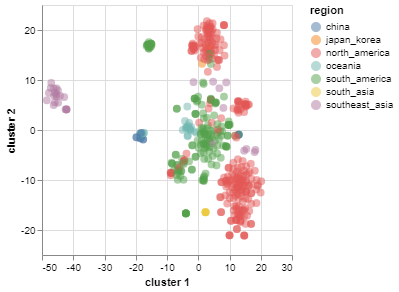

In [287]:
import altair as alt

base = alt.Chart(merged_df)
base.mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color='region',
    tooltip=['strain', 'region']
).properties(width=250,height=250).interactive()


In [ ]:
#trying out multiple clustering learning rates
#Each of these is a different "Dataframe"
from sklearn.manifold import TSNE
embedding1 = TSNE(n_components=2,metric='precomputed',learning_rate=200.0,perplexity = 25.95)
X_transformed1 = embedding1.fit_transform(dataa)
embedding2 = TSNE(n_components=2,metric='precomputed',learning_rate=100.0, perplexity = 25.95)
X_transformed2 = embedding2.fit_transform(dataa)
embedding3 = TSNE(n_components=2,metric='precomputed',learning_rate=300.0, perplexity = 25.95)
X_transformed3 = embedding3.fit_transform(dataa)
embedding4 = TSNE(n_components=2,metric='precomputed',learning_rate=400.0, perplexity = 25.95)
X_transformed4 = embedding4.fit_transform(dataa)
embedding5 = TSNE(n_components=2,metric='precomputed',learning_rate=500.0, perplexity = 25.95)
X_transformed5 = embedding5.fit_transform(dataa)
embedding6 = TSNE(n_components=2,metric='precomputed',learning_rate=600.0, perplexity = 25.95)
X_transformed6 = embedding6.fit_transform(dataa)

In [ ]:
TSNE_df1 = pd.DataFrame(X_transformed1,columns=['cluster ' + str(i) for i in range(1,3)])
TSNE_df2 = pd.DataFrame(X_transformed2,columns=['cluster ' + str(i) for i in range(1,3)])
TSNE_df3 = pd.DataFrame(X_transformed3,columns=['cluster ' + str(i) for i in range(1,3)])
TSNE_df4 = pd.DataFrame(X_transformed4,columns=['cluster ' + str(i) for i in range(1,3)])
TSNE_df5 = pd.DataFrame(X_transformed5,columns=['cluster ' + str(i) for i in range(1,3)])
TSNE_df6 = pd.DataFrame(X_transformed6,columns=['cluster ' + str(i) for i in range(1,3)])

In [ ]:
finalDf1 = pd.concat([TSNE_df1, result_strains[['region','country','strain']]], axis = 1)
finalDf2 = pd.concat([TSNE_df2, result_strains[['region','country','strain']]], axis = 1) 
finalDf3 = pd.concat([TSNE_df3, result_strains[['region','country','strain']]], axis = 1)
finalDf4 = pd.concat([TSNE_df4, result_strains[['region','country','strain']]], axis = 1)
finalDf5 = pd.concat([TSNE_df5, result_strains[['region','country','strain']]], axis = 1)
finalDf6 = pd.concat([TSNE_df6, result_strains[['region','country','strain']]], axis = 1)

In [ ]:
merged_df1 = pd.merge(finalDf1,node_df,on=["strain","region"]).dropna()
merged_df2 = pd.merge(finalDf2,node_df,on=["strain","region"]).dropna()
merged_df3 = pd.merge(finalDf3,node_df,on=["strain","region"]).dropna()
merged_df4 = pd.merge(finalDf4,node_df,on=["strain","region"]).dropna()
merged_df5 = pd.merge(finalDf5,node_df,on=["strain","region"]).dropna()
merged_df6 = pd.merge(finalDf6,node_df,on=["strain","region"]).dropna()

In [ ]:
import altair as alt

TSNE1 = alt.Chart(merged_df1).mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color='region',
    tooltip=['strain', 'region']
).properties(width=250,height=250,title="Default, 200.0").interactive()

TSNE2 = alt.Chart(merged_df2).mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color='region',
    tooltip=['strain', 'region']
).properties(width=250,height=250,title="Learning Rate: 100.0").interactive()

TSNE3 = alt.Chart(merged_df3).mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color='region',
    tooltip=['strain', 'region']
).properties(width=250,height=250,title = "Learning Rate: 300.0").interactive()

TSNE4 = alt.Chart(merged_df4).mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color='region',
    tooltip=['strain', 'region']
).properties(width=250,height=250,title = "Learning Rate: 400.0").interactive()

TSNE5 = alt.Chart(merged_df5).mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color='region',
    tooltip=['strain', 'region']
).properties(width=250,height=250,title = "Learning Rate: 500.0").interactive()

TSNE6 = alt.Chart(merged_df6).mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color='region',
    tooltip=['strain', 'region']
).properties(width=250,height=250, title = "Learning Rate: 600.0").interactive()

chart1 = TSNE2|TSNE1|TSNE3
chart2 = TSNE4|TSNE5|TSNE6
chart3 = alt.vconcat(chart1,chart2)
chart3.save('../Docs/TSNELearningRates.html')
chart3

In [ ]:
import altair as alt

#brush = alt.selection(type='interval', resolve='global')
base = alt.Chart(merged_df)
selection = alt.selection_multi(fields=['region'])

color = alt.condition(selection,
                      alt.Color('region:N', legend=None),
                      alt.value('lightgray'))

TSNE1 = base.mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color=color,
    tooltip=['strain', 'region']
).add_selection(selection).properties(width=250,height=250)

#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)
tree_name = base.mark_circle().encode(
    x=alt.X(
        "date:Q",
        scale=alt.Scale(domain=(node_df["date"].min() - 0.2, node_df["date"].max() + 0.2)),
        title="Date"
    ),
    y=alt.Y(
        "y:Q",
        title=""
    ),
    color=color,
    tooltip=["strain:N", "region:N", "date:Q"]
).add_selection(selection).properties(width=400,height=250)

legend = base.mark_point().encode(
    y=alt.Y('region:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)
#make region clickable
clickableTSNEChart = tree_name|TSNE1|legend
clickableTSNEChart.save('../Docs/TSNEClickable.html')
clickableTSNEChart
#Make this into a website (view compiled vega -- gives you the javascript -- put that into a HTML script)

In [ ]:

base = alt.Chart(merged_df)
selection = alt.selection_multi(fields=['region:N'])

color = alt.condition(selection,
                      alt.Color('region:N', legend=None),
                      alt.value('lightgray'))

TSNE1 = base.mark_circle(size=60).encode(
    x='cluster 1',
    y='cluster 2',
    opacity=alt.value(0.5),
    color=color,
    tooltip=['strain', 'region']
).add_selection(selection).properties(width=250,height=250)


legend = base.mark_point().encode(
    y=alt.Y('region:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection
)

TSNE1| legend